In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
wine = pd.read_csv('./winequality-red.csv')
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

## Exploring Dataset

In [3]:
list(wine.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

We see that, there is big difference between Mean and 50% for column - 'Free Sulphur Dioxide' and 'Total Sulphur'. Means there is skewness.
Also, we see big difference between Max and 75% for columns except - 'Quality' and Alcohol, denoting outliers in the dataset

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no missing value. It's a great thing! Phew!

## Checking Outliers

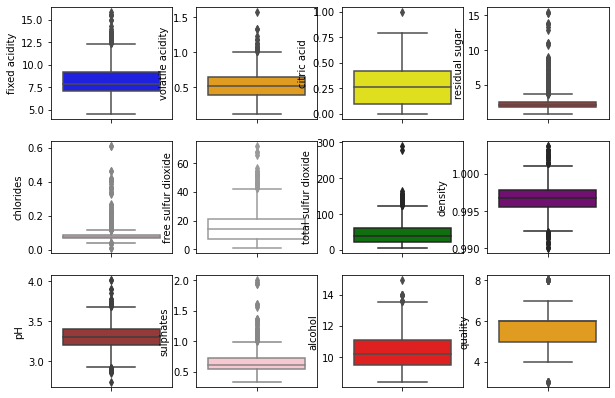

In [7]:
f, axes = plt.subplots(3, 4, figsize=(10, 7), sharex=True)

sns.boxplot('fixed acidity',data=wine,orient='v',ax=axes[0,0],color='Blue')

sns.boxplot('volatile acidity',data=wine,orient='v',ax=axes[0,1],color='orange')

sns.boxplot('citric acid',data=wine,orient='v',ax=axes[0,2],color='yellow')

sns.boxplot('residual sugar',data=wine,orient='v',ax=axes[0,3],color='red')

sns.boxplot('chlorides',data=wine,orient='v',ax=axes[1,0],color='pink')

sns.boxplot('free sulfur dioxide',data=wine,orient='v',ax=axes[1,1],color='white')

sns.boxplot('total sulfur dioxide',data=wine,orient='v',ax=axes[1,2],color='green')

sns.boxplot('density',data=wine,orient='v',ax=axes[1,3],color='purple')

sns.boxplot('pH',data=wine,orient='v',ax=axes[2,0],color='brown')

sns.boxplot('sulphates',data=wine,orient='v',ax=axes[2,1],color='pink')

sns.boxplot('alcohol',data=wine,orient='v',ax=axes[2,2],color='red')

sns.boxplot('quality',data=wine,orient='v',ax=axes[2,3],color='orange')

## Plotting graph for Correlation

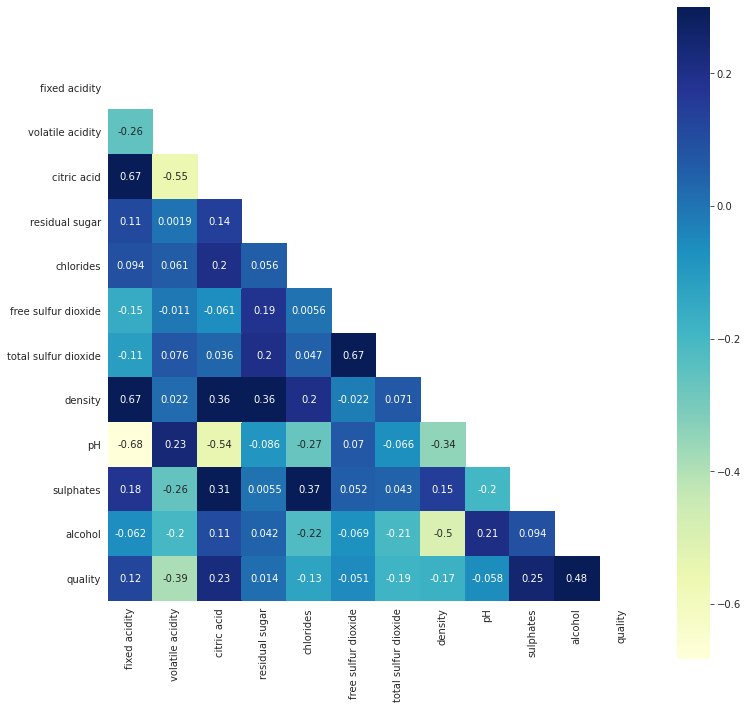

In [8]:
corr = wine.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     f, ax = plt.subplots(figsize=(12, 12))
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="YlGnBu",annot=True)

## Plotting Graphs to check Dependency of features on Quality

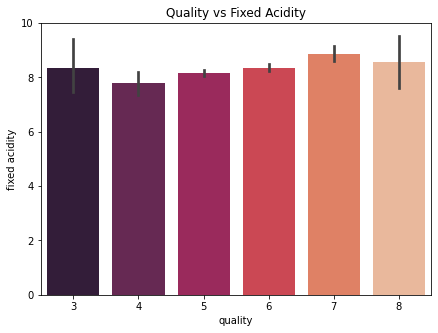

In [9]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Fixed Acidity")
sns.barplot(x='quality',y='fixed acidity',data=wine,palette='rocket')

On increasing FIXED ACIDITY, QUALITY INCREASE

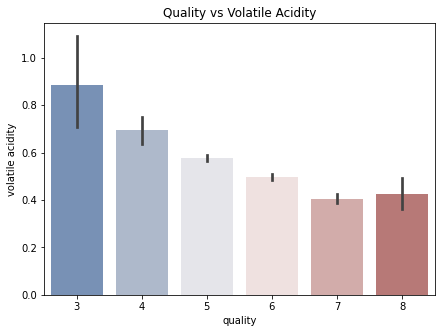

In [10]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Volatile Acidity")
sns.barplot(x='quality',y='volatile acidity',data=wine,palette='vlag')

On INCREASING VOLATILE ACIDITY, QUALITY DECREASES

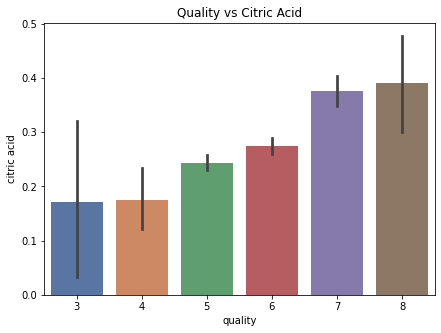

In [11]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Citric Acid")
sns.barplot(x='quality',y='citric acid',data=wine,palette='deep')

On INCREASING CITRIC ACID, QUALITY INCREASE

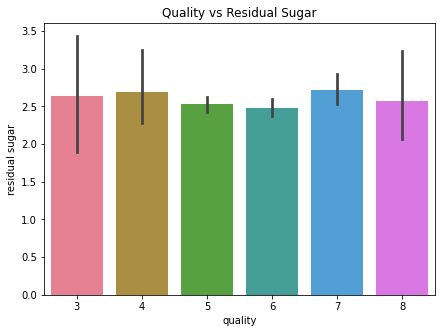

In [12]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Residual Sugar")
sns.barplot(x='quality',y='residual sugar',data=wine,palette='husl')

There is a small Positive correlation between Residual SUgar and Quality which means it doesn't affect the quality much

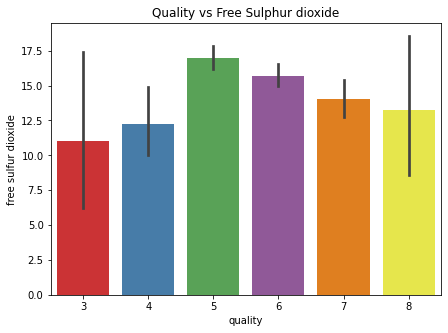

In [13]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Free Sulphur dioxide")
sns.barplot(x='quality',y='free sulfur dioxide',data=wine,palette='Set1')

SMALL NEGATIVE CORRELATION

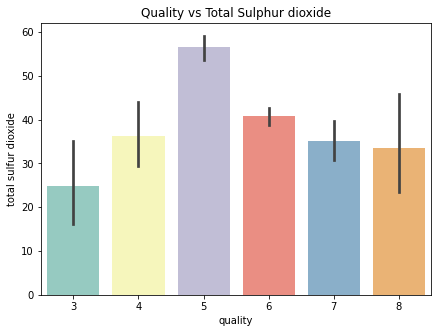

In [14]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Total Sulphur dioxide")
sns.barplot(x='quality',y='total sulfur dioxide',data=wine,palette='Set3')

QUALITY DECREASES with INCREASE in TOTAL SULFUR DIOXIDE

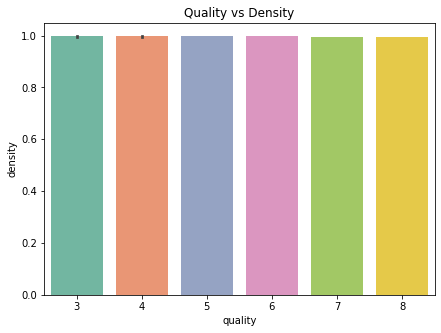

In [15]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Density")
sns.barplot(x='quality',y='density',data=wine,palette='Set2')

SMALL DECREASE in QUALITY with INCREASE in DENSITY

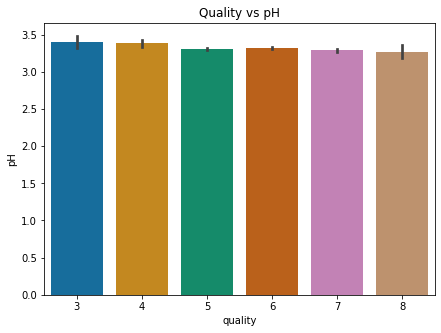

In [16]:
plt.figure(figsize=(7,5))
plt.title("Quality vs pH")
sns.barplot(x='quality',y='pH',data=wine,palette='colorblind')

SMALL NEGATIVE CORRELATION BETWEEN pH and Quality. Doesn't seem to affect much!

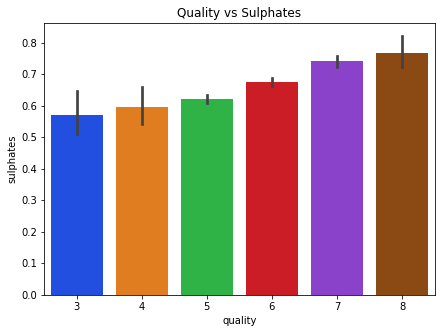

In [17]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Sulphates")
sns.barplot(x='quality',y='sulphates',data=wine,palette='bright')

QUALITY INCREASES with INCREASE in SULPHATES

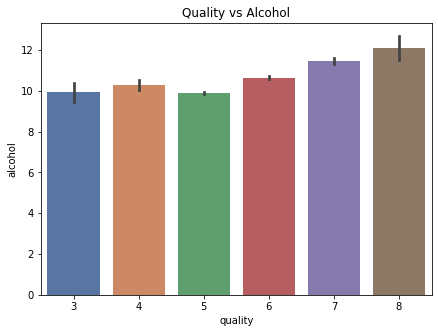

In [18]:
plt.figure(figsize=(7,5))
plt.title("Quality vs Alcohol")
sns.barplot(x='quality',y='alcohol',data=wine,palette='deep')

QUALITY INCREASES with INCREASE of ALCOHOL

## Plotting and calculating Skewness

In [19]:
print("Skewness and Kurtosis of all the columns")
print("++++++++++++++++++++++++++++++++++++++++++")
for col in list(wine.columns):
    print("{0} - Skewness : {1:.3f} and Kurtosis : {2:.3f}".format(col,wine[col].skew(),wine[col].kurt()))
    print("-----------------------------------------------")

Skewness and Kurtosis of all the columns
++++++++++++++++++++++++++++++++++++++++++
fixed acidity - Skewness : 0.983 and Kurtosis : 1.132
-----------------------------------------------
volatile acidity - Skewness : 0.672 and Kurtosis : 1.226
-----------------------------------------------
citric acid - Skewness : 0.318 and Kurtosis : -0.789
-----------------------------------------------
residual sugar - Skewness : 4.541 and Kurtosis : 28.618
-----------------------------------------------
chlorides - Skewness : 5.680 and Kurtosis : 41.716
-----------------------------------------------
free sulfur dioxide - Skewness : 1.251 and Kurtosis : 2.024
-----------------------------------------------
total sulfur dioxide - Skewness : 1.516 and Kurtosis : 3.810
-----------------------------------------------
density - Skewness : 0.071 and Kurtosis : 0.934
-----------------------------------------------
pH - Skewness : 0.194 and Kurtosis : 0.807
-----------------------------------------------
s

Text(0, 0.5, 'Count')

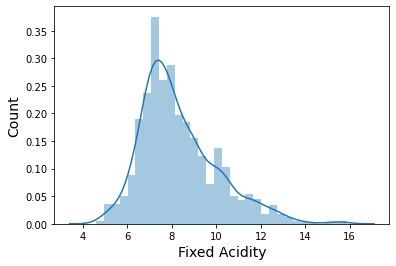

In [20]:
ax = sns.distplot(wine['fixed acidity'])
ax.set_xlabel('Fixed Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

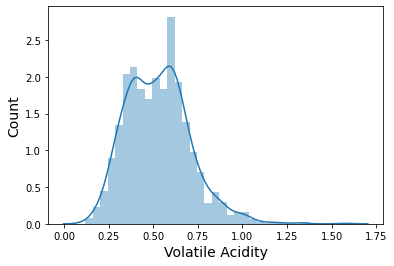

In [21]:
ax = sns.distplot(wine['volatile acidity'])
ax.set_xlabel('Volatile Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

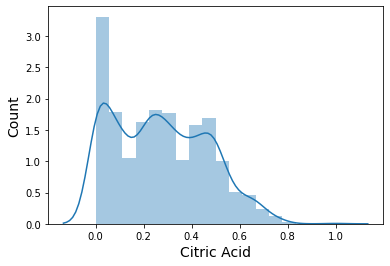

In [22]:
ax = sns.distplot(wine['citric acid'])
ax.set_xlabel('Citric Acid',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

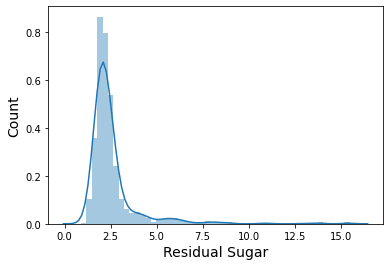

In [23]:
ax = sns.distplot(wine['residual sugar'])
ax.set_xlabel('Residual Sugar',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

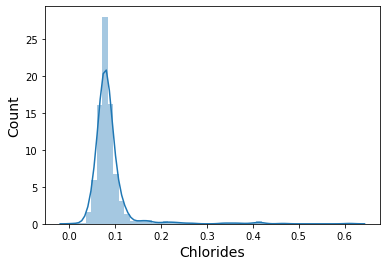

In [24]:
ax = sns.distplot(wine['chlorides'])
ax.set_xlabel('Chlorides',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

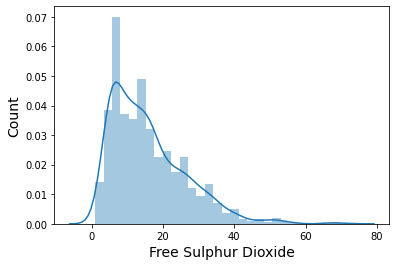

In [25]:
ax = sns.distplot(wine['free sulfur dioxide'])
ax.set_xlabel('Free Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

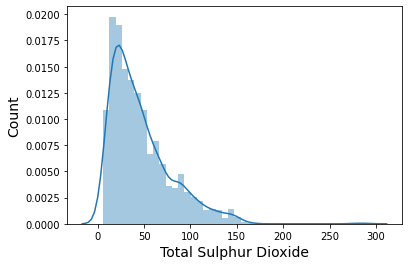

In [26]:
ax = sns.distplot(wine['total sulfur dioxide'])
ax.set_xlabel('Total Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

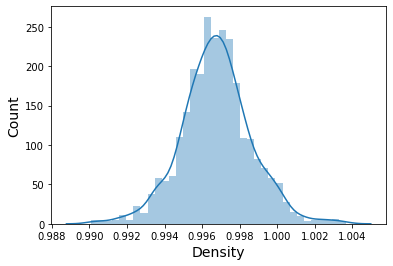

In [27]:
ax = sns.distplot(wine['density'])
ax.set_xlabel('Density',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

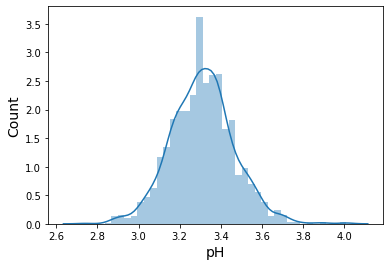

In [28]:
ax = sns.distplot(wine['pH'])
ax.set_xlabel('pH',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

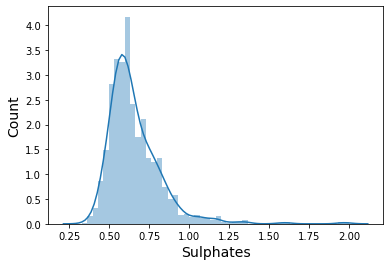

In [29]:
ax = sns.distplot(wine['sulphates'])
ax.set_xlabel('Sulphates',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

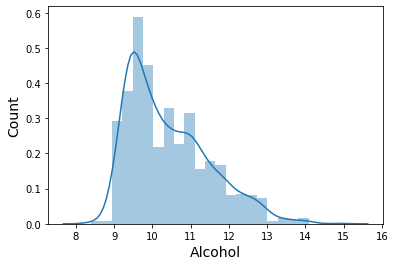

In [30]:
ax = sns.distplot(wine['alcohol'])
ax.set_xlabel('Alcohol',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

## Note - Skewness is caused by Outliers present in the dataset. So ny removing outliers we remove the SKewness also

## Removing Skewness by calculating IQR value (Interquartile Range)

In [31]:
wineCopy = wine
wineCopy.drop(['quality'],axis=1,inplace=True)

In [32]:
from scipy import stats

q1 = wineCopy.quantile(0.25)
q3 = wineCopy.quantile(0.75)
iqr = q3 - q1

Q1 = q1
Q3 = q3
IQR = iqr

print(iqr)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
dtype: float64


In [33]:
print(wineCopy < (11 - 1.5 * iqr)) or (wineCopy > (q3 + 1.5 * iqr))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              True              True         True            True       True   
1              True              True         True            True       True   
2              True              True         True            True       True   
3             False              True         True            True       True   
4              True              True         True            True       True   
...             ...               ...          ...             ...        ...   
1594           True              True         True            True       True   
1595           True              True         True            True       True   
1596           True              True         True            True       True   
1597           True              True         True            True       True   
1598           True              True         True            True       True   

      free sulfur dioxide  

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
1594    False  
1595    False  
1596    False  
1597    False  
1598    False  

[1599 rows x 11 columns]

In [34]:
wineCopy = wineCopy[~((wineCopy < (Q1 - 1.5 * IQR)) |(wineCopy > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
wineCopy.shape

(1194, 11)

In [36]:
print("Skewness and Kurtosis of all the columns after Removing Outliers")
print("++++++++++++++++++++++++++++++++++++++++++")
for col in list(wineCopy.columns):
    print("{0} - Skewness : {1:.3f} and Kurtosis : {2:.3f}".format(col,wineCopy[col].skew(),wineCopy[col].kurt()))
    print("-----------------------------------------------")

Skewness and Kurtosis of all the columns after Removing Outliers
++++++++++++++++++++++++++++++++++++++++++
fixed acidity - Skewness : 0.731 and Kurtosis : 0.044
-----------------------------------------------
volatile acidity - Skewness : 0.286 and Kurtosis : -0.233
-----------------------------------------------
citric acid - Skewness : 0.306 and Kurtosis : -0.921
-----------------------------------------------
residual sugar - Skewness : 0.620 and Kurtosis : 0.422
-----------------------------------------------
chlorides - Skewness : 0.226 and Kurtosis : 0.200
-----------------------------------------------
free sulfur dioxide - Skewness : 0.845 and Kurtosis : 0.085
-----------------------------------------------
total sulfur dioxide - Skewness : 0.982 and Kurtosis : 0.332
-----------------------------------------------
density - Skewness : 0.047 and Kurtosis : -0.006
-----------------------------------------------
pH - Skewness : 0.060 and Kurtosis : -0.206
------------------------

Now we see that Skewness has reduced a lot compared to previous values of Skewness of each Column. Now we can proceed with Training our model for prediction of Quality. Outliers may tamper our model's prediction as they are values which have been miscalculated or values which have been recorded wrong

## Plotting Graphs to Compare Skewness

Text(0, 0.5, 'Count')

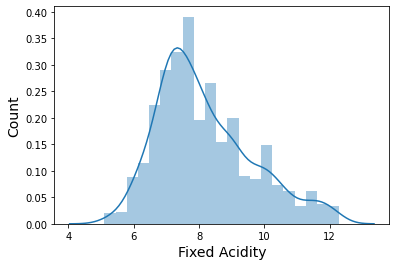

In [37]:
ax = sns.distplot(wineCopy['fixed acidity'])
ax.set_xlabel('Fixed Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

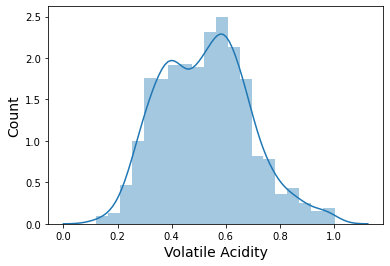

In [38]:
ax = sns.distplot(wineCopy['volatile acidity'])
ax.set_xlabel('Volatile Acidity',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

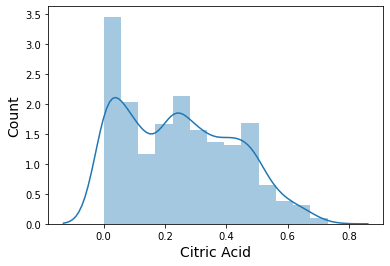

In [39]:
ax = sns.distplot(wineCopy['citric acid'])
ax.set_xlabel('Citric Acid',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

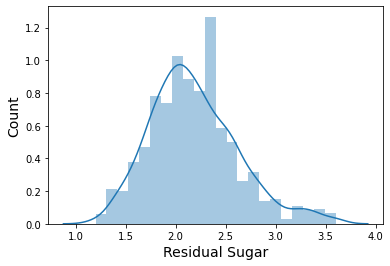

In [40]:
ax = sns.distplot(wineCopy['residual sugar'])
ax.set_xlabel('Residual Sugar',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

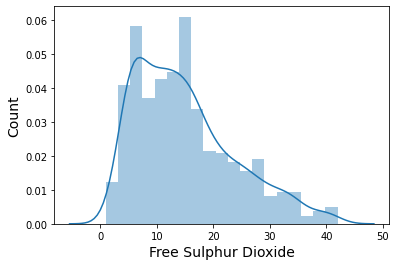

In [41]:
ax = sns.distplot(wineCopy['free sulfur dioxide'])
ax.set_xlabel('Free Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

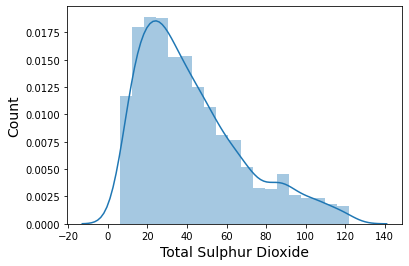

In [42]:
ax = sns.distplot(wineCopy['total sulfur dioxide'])
ax.set_xlabel('Total Sulphur Dioxide',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

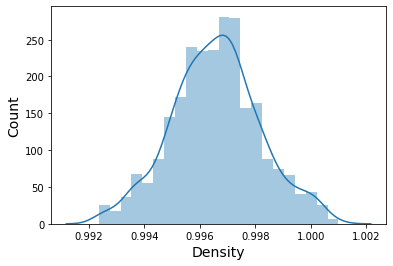

In [43]:
ax = sns.distplot(wineCopy['density'])
ax.set_xlabel('Density',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

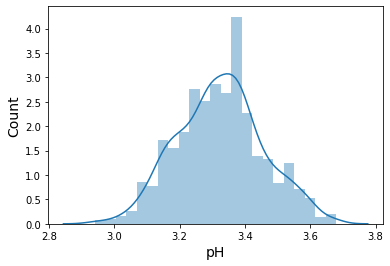

In [44]:
ax = sns.distplot(wineCopy['pH'])
ax.set_xlabel('pH',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

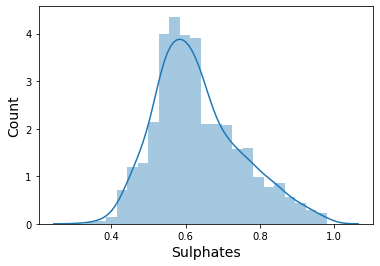

In [45]:
ax = sns.distplot(wineCopy['sulphates'])
ax.set_xlabel('Sulphates',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

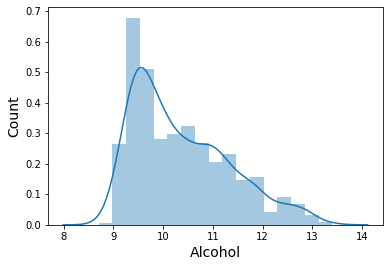

In [46]:
ax = sns.distplot(wineCopy['alcohol'])
ax.set_xlabel('Alcohol',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Now you can compare each graphs after removing outliers to that which had outliers. A great difference we see. No Positive or Negative skewness is observed. Now we are sure that skewness has reduced a lot. Hence we can start training of out data